<a href="https://colab.research.google.com/github/mwiryan/probability_and_statistics/blob/main/probability_and_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description
This notebook originated while preparing for technical interviews; the subsequent updates were inspired by [CodeAcademy's series on statistics with Python](https://www.youtube.com/playlist?list=PLFzsFUO-y0HDWkdsBMtufEThI2I3c9WlZ) in an attempt to create a teaching tool while solidifying connections in my own learning between programming, statistics, probability, algorithmms, and data structures.

## Organization
1. Random Variables
  * Discrete
  * Continuous
2. Probability
  * Markov Chains
3. Linear Algebra
4. Hypothesis Testing
  * Permutation Testing
5. Large Sample Approximations and the Bootstrap
  * (Weak) Law of Large Numbers
  * Central Limit Theorem
  * Bootstrap
    * Parametric
    * Non-Parametric
    * Various Confidence Intervals

# (Weak) Law of Large Numbers
Suppose $X_1$, $X_2$, ..., $X_n$ are i.i.d. with $E[X_1] = \mu$ and $Var(X_1) < \infty$, then $\bar{X_n} = n^{-1}\sum_{i=1}^{n} X_i \rightarrow \mu$ in probability as $n \rightarrow \infty$.

In [ ]:
# LLN
# Tells us that the sample mean converges to the population mean
import numpy as np

# Generate sample from standard normal
data = np.random.normal(size=100)

# If we repeatedly sample data from a standard normal distribution
# Then the mean will converge to the population mean of zero, which
# is defined by the underlying Gaussian data generation process

# Repeatedly sample normal and compute the mean
averages = []
for i in range(10000):
  data = np.random.normal(size=10)
  average = data.mean()
  averages.append(average)

sum(averages) / 10000

4.46573940592058e-05

# Central Limit Theorem
Suppose $X_1$, $X_2$, ..., $X_n$ are i.i.d. with $E[X_1] = \mu$ and $Var(X_1) < \infty$. Let $\bar{X_n} = n^{-1}\sum_{i=1}^{n} X_i$. Then $\frac{\sqrt{n}}{\sigma}(\bar{X_n} - \mu) \rightarrow N(0, 1)$ in probability as $n \rightarrow \infty$.

In [ ]:
# CLT
# Tells that the sampling distribution of the sample mean converges to a normal distribution

# Generate a random sample of size n=1000 from non-standard normal
n=1000
data = np.random.normal(loc=100, scale=10, size=n)
sample_mean = sum(data) / 1000
np.sqrt(n)/10 * (sample_mean - 100)

0.29180592948246253

# Linear Regression
In this lesson, we learn how to check the appropriateness of a simple linear regression model. Recall that the four conditions ("LINE") that comprise the simple linear regression model are:

Linear Function: The mean of the response, 
E
(
Y
i
)
, at each value of the predictor, 
x
i
, is a Linear function of the 
x
i
.
Independent: The errors, 
ϵ
i
, are Independent.
Normally Distributed: The errors, 
ϵ
i
, at each value of the predictor, 
x
i
, are Normally distributed.
Equal variances: The errors, 
ϵ
i
, at each value of the predictor, 
x
i
, have Equal variances (denoted 
σ
2
).
An equivalent way to think of the first (linearity) condition is that the mean of the error, 
E
(
ϵ
i
)
, at each value of the predictor, 
x
i
, is zero. An alternative way to describe all four assumptions is that the errors, 
ϵ
i
, are independent normal random variables with mean zero and constant variance, 
σ
2
.

In [ ]:
# Permutation test

# I observed 8 tails in 10 flips of a coin. Is the coin likely to be fair?

# Assuming flips are independent...
# Let H = heads, then H ~ Bern(p)

# If it is fair, then p = 0.5; otherwise, it is more likely to flip tails
# (e.g., p < 0.5)

# H_0: p = 0.5
# H_1: p < 0.5

# We need to estimate the probability of observing 8/10 tails
p = [None] * 10000
for i in range(10000):
  experiment = np.random.randint(2, size=10)

  proportion_heads = experiment.mean()

  proportion_tails = 1 - proportion_heads

  p[i] = proportion_tails

print('The data appear incompatible with the null hypothesis')
round(1 - (sum([0.8 >= x for x in p]) / 10000), 4)

The data appear incompatible with the null hypothesis


0.0111

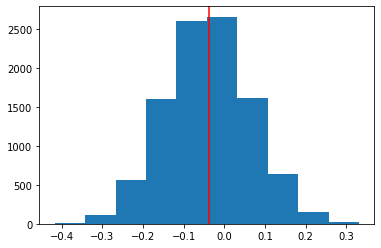

In [ ]:
# Parametric bootstrap

# We have some data and are interested in the sample
# mean, but we don't know how variable our estimate is

# We assume that the data are generated according to a Gaussian process

import matplotlib.pyplot as plt

# Generate some data
x = np.random.randn(100)
sample_mean = sum(x) / 100
sample_sd = np.sqrt(np.var(x))

stats = []
for i in range(10000):
  # Generate new data based on what we observed
  data = np.random.normal(loc = sample_mean, scale = sample_sd, size = len(x))

  # Calculate statistic of interest
  average = np.mean(data)

  # Collect statistics
  stats.append(average)

plt.hist(stats)
plt.axvline(x=sample_mean, color='red');

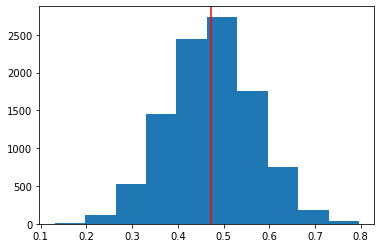

In [ ]:
# Non-Parametric Bootstrap

# Generate data
x = np.random.random(size=100)
sample_mean = np.mean(x)

# Resample with remplacement
stats = []
for _ in range(10000):
  data = np.random.choice(x, size=10, replace=True)
  stats.append(data.mean())

plt.hist(stats)
plt.axvline(sample_mean, color='red');



In [ ]:
# y = 3a + 2b + error1
# b = 0.2a + error2
import numpy as np
np.random.seed(25)

# Full
# y = beta_1 * a + beta_2 * b
# beta_1 = 3; beta_2 = 2
error_1 = np.random.normal(size=100)
error_2 = np.random.normal(size=100)
a = np.random.random(size=100)
b = 0.2*a + error_2
y = 3*a + 2*b + error_1
# print(y.shape, a.shape, b.shape, error_1.shape, error_2.shape)

# beta_hat = (X^T * X)^-1 * (X^T * y)
X = np.array([a, b]).T
# print(X.shape)
betas = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
print(f'Beta 1: {betas[0]}, Beta 2: {betas[1]}\n')

# Reduced
# y = beta_1 * a
# => y = 3a + 2(0.2a + error) + error 
# => y = 3.4a + error
# beta_1 = 3.4
y = 3.4*a + error_1
# print(y.shape)
beta = (1/np.dot(a.T, a)) * np.dot(a.T, y)
print(f'Beta 1: {beta}')

Beta 1: 3.070587649908423, Beta 2: 2.136577726478282

Beta 1: 3.481014868998334
